### Importing libraries

In [1]:
import pymysql as pms
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model as slm
import sklearn.metrics as sm
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.svm as svm
import sklearn.ensemble as sen
import sklearn.preprocessing as sp

from warnings import filterwarnings
filterwarnings('ignore')

### Loading data

In [2]:
conn=pms.Connect(host='localhost', user='***', passwd='*****', db='***')

In [3]:
dt=pd.read_sql('select * from ***', con=conn)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
dt.head()

,npl_group,branch_code,cust_id,account_ssuda,teyinat,kr_kx,date_start,date_end,maturity,amount,intrate,annuity,currency,exrate,res_pricipal,over_days_prin,arr_prin,over_days_int,arr_int,max_over_days
0,PKD,1,182607,1-182607-3,Mikro,KR,2003-05-15,2008-05-15,60,98000.0,7.0,0.0,AZN,1.0000,0.00,0,42037.57,4189,42037.57,4189
1,PKD,1,29467045,1-29467045-3,Mikro,KR,2010-02-09,2012-02-09,24,40000.0,27.0,0.0,AZN,1.0000,0.00,0,36397.82,2629,36397.82,2629
2,0,1,32566184,1-32566184-3,Istehlak,KX,2010-05-31,2011-05-31,12,0.0,25.0,0.0,EUR,1.8644,73.98,2040,39.68,2486,81.33,2486
3,0,1,42807960,1-42807960-3,Istehlak,KR,2012-04-24,2013-10-24,18,1364.0,25.0,0.0,USD,1.7707,0.00,0,0.00,0,0.00,0
4,0,1,70000546,1-70000546-6,Istehlak,KX,2013-08-13,2015-08-13,24,0.0,27.0,0.0,USD,1.7707,8.13,505,4.59,770,3.93,770


### Preprocessing

In [6]:
df=dt[(dt['teyinat']=='Istehlak')&(dt['kr_kx']=='KR')&(dt['date_start']>='2013-01-01')&((dt['amount']*dt['exrate'])<40000)]

In [7]:
df.head()

,npl_group,branch_code,cust_id,account_ssuda,teyinat,kr_kx,date_start,date_end,maturity,amount,intrate,annuity,currency,exrate,res_pricipal,over_days_prin,arr_prin,over_days_int,arr_int,max_over_days
5,PKD,1,70000612,1-70000612-5,Istehlak,KR,2013-07-11,2015-01-11,18,1500.0,33.0,0.0,AZN,1.0000,1287.91,1145,1287.91,1530,2169.45,1530
6,PKD,1,70001320,1-70001320-4,Istehlak,KR,2013-07-17,2015-01-17,18,1900.0,33.0,0.0,USD,1.7707,1650.97,927,932.38,625,793.26,927
7,PKD,1,70004187,1-70004187-4,Istehlak,KR,2013-08-05,2015-02-05,18,1660.0,33.0,0.0,USD,1.7707,1260.10,878,711.64,1107,919.73,1107
8,PKD,1,70005562,1-70005562-5,Istehlak,KR,2013-08-14,2015-02-14,18,1900.0,33.0,0.0,USD,1.7707,3077.21,1173,1737.85,1303,2628.99,1303
9,PKD,1,70006140,1-70006140-6,Istehlak,KR,2014-03-12,2016-03-12,24,2000.0,32.0,0.0,AZN,1.0000,1100.18,627,1100.18,608,789.67,627


In [8]:
df.shape, dt.shape

((25250, 20), (83859, 20))

In [9]:
#1.df['dft']=df.max_over_days.apply(lambda x: int((x>360)))

df['dft']=(df.max_over_days>360).astype(np.int8)

df.head()

,npl_group,branch_code,cust_id,account_ssuda,teyinat,kr_kx,date_start,date_end,maturity,amount,intrate,annuity,currency,exrate,res_pricipal,over_days_prin,arr_prin,over_days_int,arr_int,max_over_days,dft
5,PKD,1,70000612,1-70000612-5,Istehlak,KR,2013-07-11,2015-01-11,18,1500.0,33.0,0.0,AZN,1.0000,1287.91,1145,1287.91,1530,2169.45,1530,1
6,PKD,1,70001320,1-70001320-4,Istehlak,KR,2013-07-17,2015-01-17,18,1900.0,33.0,0.0,USD,1.7707,1650.97,927,932.38,625,793.26,927,1
7,PKD,1,70004187,1-70004187-4,Istehlak,KR,2013-08-05,2015-02-05,18,1660.0,33.0,0.0,USD,1.7707,1260.10,878,711.64,1107,919.73,1107,1
8,PKD,1,70005562,1-70005562-5,Istehlak,KR,2013-08-14,2015-02-14,18,1900.0,33.0,0.0,USD,1.7707,3077.21,1173,1737.85,1303,2628.99,1303,1
9,PKD,1,70006140,1-70006140-6,Istehlak,KR,2014-03-12,2016-03-12,24,2000.0,32.0,0.0,AZN,1.0000,1100.18,627,1100.18,608,789.67,627,1


In [10]:
df.dft.value_counts()

1    13499
0    11751
Name: dft, dtype: int64

In [11]:
df.dft.sum()

13499

In [12]:
df=df[(df.max_over_days>360)|(df.max_over_days<=120)]
df.head()

,npl_group,branch_code,cust_id,account_ssuda,teyinat,kr_kx,date_start,date_end,maturity,amount,intrate,annuity,currency,exrate,res_pricipal,over_days_prin,arr_prin,over_days_int,arr_int,max_over_days,dft
5,PKD,1,70000612,1-70000612-5,Istehlak,KR,2013-07-11,2015-01-11,18,1500.0,33.0,0.0,AZN,1.0000,1287.91,1145,1287.91,1530,2169.45,1530,1
6,PKD,1,70001320,1-70001320-4,Istehlak,KR,2013-07-17,2015-01-17,18,1900.0,33.0,0.0,USD,1.7707,1650.97,927,932.38,625,793.26,927,1
7,PKD,1,70004187,1-70004187-4,Istehlak,KR,2013-08-05,2015-02-05,18,1660.0,33.0,0.0,USD,1.7707,1260.10,878,711.64,1107,919.73,1107,1
8,PKD,1,70005562,1-70005562-5,Istehlak,KR,2013-08-14,2015-02-14,18,1900.0,33.0,0.0,USD,1.7707,3077.21,1173,1737.85,1303,2628.99,1303,1
9,PKD,1,70006140,1-70006140-6,Istehlak,KR,2014-03-12,2016-03-12,24,2000.0,32.0,0.0,AZN,1.0000,1100.18,627,1100.18,608,789.67,627,1


In [13]:
df.dft.value_counts(), df.shape

(1    13499
 0     7685
 Name: dft, dtype: int64, (21184, 21))

In [14]:
df.columns

Index(['npl_group', 'branch_code', 'cust_id', 'account_ssuda', 'teyinat',
       'kr_kx', 'date_start', 'date_end', 'maturity', 'amount', 'intrate',
       'annuity', 'currency', 'exrate', 'res_pricipal', 'over_days_prin',
       'arr_prin', 'over_days_int', 'arr_int', 'max_over_days', 'dft'],
      dtype='object')

In [15]:
dm=df.drop(columns=['npl_group','cust_id','account_ssuda','teyinat','kr_kx','res_pricipal', 'over_days_prin',
'arr_prin', 'over_days_int', 'arr_int', 'max_over_days'])
dm.head()

,branch_code,date_start,date_end,maturity,amount,intrate,annuity,currency,exrate,dft
5,1,2013-07-11,2015-01-11,18,1500.0,33.0,0.0,AZN,1.0000,1
6,1,2013-07-17,2015-01-17,18,1900.0,33.0,0.0,USD,1.7707,1
7,1,2013-08-05,2015-02-05,18,1660.0,33.0,0.0,USD,1.7707,1
8,1,2013-08-14,2015-02-14,18,1900.0,33.0,0.0,USD,1.7707,1
9,1,2014-03-12,2016-03-12,24,2000.0,32.0,0.0,AZN,1.0000,1


In [16]:
# calculated amount
dm['clt_amount']=dm['amount']*dm['exrate']
dm.drop(columns=['amount'], inplace=True)
dm.head()

,branch_code,date_start,date_end,maturity,intrate,annuity,currency,exrate,dft,clt_amount
5,1,2013-07-11,2015-01-11,18,33.0,0.0,AZN,1.0000,1,1500.000
6,1,2013-07-17,2015-01-17,18,33.0,0.0,USD,1.7707,1,3364.330
7,1,2013-08-05,2015-02-05,18,33.0,0.0,USD,1.7707,1,2939.362
8,1,2013-08-14,2015-02-14,18,33.0,0.0,USD,1.7707,1,3364.330
9,1,2014-03-12,2016-03-12,24,32.0,0.0,AZN,1.0000,1,2000.000


In [17]:
dm.currency.value_counts()

USD    12956
AZN     8224
EUR        4
Name: currency, dtype: int64

In [18]:
dm=pd.get_dummies(dm, columns=['currency'],prefix=['cur'])
dm.head()

,branch_code,date_start,date_end,maturity,intrate,annuity,exrate,dft,clt_amount,cur_AZN,cur_EUR,cur_USD
5,1,2013-07-11,2015-01-11,18,33.0,0.0,1.0000,1,1500.000,1,0,0
6,1,2013-07-17,2015-01-17,18,33.0,0.0,1.7707,1,3364.330,0,0,1
7,1,2013-08-05,2015-02-05,18,33.0,0.0,1.7707,1,2939.362,0,0,1
8,1,2013-08-14,2015-02-14,18,33.0,0.0,1.7707,1,3364.330,0,0,1
9,1,2014-03-12,2016-03-12,24,32.0,0.0,1.0000,1,2000.000,1,0,0


In [19]:
# to take year and month
def yd(d):
    return str(d)[0:4]
def mn(a):
    return str(a)[5:7]

In [20]:
dm['year']=dm.date_start.apply(yd)
dm['month']=dm.date_start.apply(mn)
dm.drop(columns=['branch_code','date_end', 'annuity', 'exrate', 'cur_USD'], inplace=True)
dm.head()

,date_start,maturity,intrate,dft,clt_amount,cur_AZN,cur_EUR,year,month
5,2013-07-11,18,33.0,1,1500.000,1,0,2013,07
6,2013-07-17,18,33.0,1,3364.330,0,0,2013,07
7,2013-08-05,18,33.0,1,2939.362,0,0,2013,08
8,2013-08-14,18,33.0,1,3364.330,0,0,2013,08
9,2014-03-12,24,32.0,1,2000.000,1,0,2014,03


In [21]:
dm.year.value_counts(), dm.month.value_counts()

(2014    9618
 2013    5484
 2015    4868
 2016    1214
 Name: year, dtype: int64, 10    2448
 12    2427
 11    2237
 09    2228
 08    1841
 01    1800
 07    1661
 02    1570
 06    1338
 05    1309
 04    1224
 03    1101
 Name: month, dtype: int64)

In [22]:
# creating dummy variables on year and month
dm=pd.get_dummies(dm, prefix=['yr','mn'], columns=['year', 'month'])
dm.head()

,date_start,maturity,intrate,dft,clt_amount,cur_AZN,cur_EUR,yr_2013,yr_2014,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_10,mn_11,mn_12
5,2013-07-11,18,33.0,1,1500.000,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,2013-07-17,18,33.0,1,3364.330,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,2013-08-05,18,33.0,1,2939.362,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,2013-08-14,18,33.0,1,3364.330,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,2014-03-12,24,32.0,1,2000.000,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [23]:
# dropping mostly existed dummy variables to avoid multicollinearity
dm.drop(columns=['date_start','yr_2014','mn_10'], inplace=True)
dm.head()

,maturity,intrate,dft,clt_amount,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12
5,18,33.0,1,1500.000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,18,33.0,1,3364.330,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
7,18,33.0,1,2939.362,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8,18,33.0,1,3364.330,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,24,32.0,1,2000.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


#### Polynomial features

In [24]:
Pl=sp.PolynomialFeatures()

In [25]:
poly=pd.DataFrame(Pl.fit_transform(dm[['maturity','intrate','clt_amount']]))
poly.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,18.0,33.0,1500.000,324.0,594.0,27000.000,1089.0,49500.000,2.250000e+06
1,1.0,18.0,33.0,3364.330,324.0,594.0,60557.940,1089.0,111022.890,1.131872e+07
2,1.0,18.0,33.0,2939.362,324.0,594.0,52908.516,1089.0,96998.946,8.639849e+06
3,1.0,18.0,33.0,3364.330,324.0,594.0,60557.940,1089.0,111022.890,1.131872e+07
4,1.0,24.0,32.0,2000.000,576.0,768.0,48000.000,1024.0,64000.000,4.000000e+06


In [26]:
Pl.get_feature_names(input_features=['maturity','intrate','clt_amount'])

['1',
 'maturity',
 'intrate',
 'clt_amount',
 'maturity^2',
 'maturity intrate',
 'maturity clt_amount',
 'intrate^2',
 'intrate clt_amount',
 'clt_amount^2']

In [27]:
poly.columns=['1',
 'maturity',
 'intrate',
 'clt_amount',
 'maturity^2',
 'maturity__intrate',
 'maturity__clt_amount',
 'intrate^2',
 'intrate__clt_amount',
 'clt_amount^2']
poly.drop(columns=['1'], inplace=True)
poly.head()

,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,18.0,33.0,1500.000,324.0,594.0,27000.000,1089.0,49500.000,2.250000e+06
1,18.0,33.0,3364.330,324.0,594.0,60557.940,1089.0,111022.890,1.131872e+07
2,18.0,33.0,2939.362,324.0,594.0,52908.516,1089.0,96998.946,8.639849e+06
3,18.0,33.0,3364.330,324.0,594.0,60557.940,1089.0,111022.890,1.131872e+07
4,24.0,32.0,2000.000,576.0,768.0,48000.000,1024.0,64000.000,4.000000e+06


In [28]:
dm.reset_index(drop=True, inplace=True)
dm.head()

,maturity,intrate,dft,clt_amount,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12
0,18,33.0,1,1500.000,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,18,33.0,1,3364.330,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,18,33.0,1,2939.362,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,18,33.0,1,3364.330,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,24,32.0,1,2000.000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [29]:
dm=dm.drop(columns=['maturity','intrate','clt_amount']).merge(poly, left_index=True, right_index=True)
dm.head()

,dft,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,18.0,33.0,1500.000,324.0,594.0,27000.000,1089.0,49500.000,2.250000e+06
1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,18.0,33.0,3364.330,324.0,594.0,60557.940,1089.0,111022.890,1.131872e+07
2,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,18.0,33.0,2939.362,324.0,594.0,52908.516,1089.0,96998.946,8.639849e+06
3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,18.0,33.0,3364.330,324.0,594.0,60557.940,1089.0,111022.890,1.131872e+07
4,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,24.0,32.0,2000.000,576.0,768.0,48000.000,1024.0,64000.000,4.000000e+06


### Splitting data

In [30]:
x_train, x_test, y_train, y_test=train_test_split(dm.drop(columns=['dft']),dm[['dft']], test_size=0.25, random_state=25)

In [31]:
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [32]:
nms=['maturity',
 'intrate',
 'clt_amount',
 'maturity^2',
 'maturity__intrate',
 'maturity__clt_amount',
 'intrate^2',
 'intrate__clt_amount',
 'clt_amount^2']

In [33]:
rb=sp.RobustScaler()

In [34]:
sc_x_train=pd.DataFrame(rb.fit_transform(x_train[nms]), 
columns=[nms])
sc_x_train.head()

,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,2.1,-1.2,1.813864,3.150000,1.150943,3.141489,-1.090909,1.338796,3.295488
1,-0.6,0.0,-0.288458,-0.547826,-0.377358,-0.278492,0.000000,-0.276395,-0.197556
2,-1.2,0.0,-0.215460,-0.939130,-0.905660,-0.344258,0.000000,-0.200152,-0.156031
3,0.0,0.8,1.117172,0.000000,0.452830,0.884486,0.872727,1.474821,1.610638
4,-1.2,0.0,-0.380198,-0.939130,-0.905660,-0.406926,0.000000,-0.372212,-0.241605


In [35]:
x_train.head()

,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,45.0,22.0,10288.723178,2025.0,990.0,462992.543010,484.0,226351.909916,1.058578e+08
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,18.0,28.0,1950.408343,324.0,504.0,35107.350174,784.0,54611.433604,3.804093e+06
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,12.0,28.0,2239.935500,144.0,336.0,26879.226000,784.0,62718.194000,5.017311e+06
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,24.0,32.0,7525.475000,576.0,768.0,180611.400000,1024.0,240815.200000,5.663277e+07
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.0,28.0,1586.547200,144.0,336.0,19038.566400,784.0,44423.321600,2.517132e+06


In [36]:
x_train.drop(columns=nms, inplace=True)
x_train.head()

,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
x_train=x_train.merge(sc_x_train,left_index=True, right_index=True)
x_train.head()

,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12,"(maturity,)","(intrate,)","(clt_amount,)","(maturity^2,)","(maturity__intrate,)","(maturity__clt_amount,)","(intrate^2,)","(intrate__clt_amount,)","(clt_amount^2,)"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.1,-1.2,1.813864,3.150000,1.150943,3.141489,-1.090909,1.338796,3.295488
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.6,0.0,-0.288458,-0.547826,-0.377358,-0.278492,0.000000,-0.276395,-0.197556
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.2,0.0,-0.215460,-0.939130,-0.905660,-0.344258,0.000000,-0.200152,-0.156031
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.8,1.117172,0.000000,0.452830,0.884486,0.872727,1.474821,1.610638
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.2,0.0,-0.380198,-0.939130,-0.905660,-0.406926,0.000000,-0.372212,-0.241605


In [38]:
x_train.columns

Index([                'cur_AZN',                 'cur_EUR',
                       'yr_2013',                 'yr_2015',
                       'yr_2016',                   'mn_01',
                         'mn_02',                   'mn_03',
                         'mn_04',                   'mn_05',
                         'mn_06',                   'mn_07',
                         'mn_08',                   'mn_09',
                         'mn_11',                   'mn_12',
                   ('maturity',),              ('intrate',),
                 ('clt_amount',),           ('maturity^2',),
          ('maturity__intrate',), ('maturity__clt_amount',),
                  ('intrate^2',),  ('intrate__clt_amount',),
               ('clt_amount^2',)],
      dtype='object')

In [39]:
x_train.columns=['cur_AZN','cur_EUR',
'yr_2013',  'yr_2015',
'yr_2016', 'mn_01','mn_02','mn_03','mn_04','mn_05',
'mn_06','mn_07','mn_08','mn_09','mn_11','mn_12','maturity','intrate',
'clt_amount', 'maturity^2','maturity__intrate', 'maturity__clt_amount',
'intrate^2',  'intrate__clt_amount','clt_amount^2']
x_train.head()

,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2.1,-1.2,1.813864,3.150000,1.150943,3.141489,-1.090909,1.338796,3.295488
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.6,0.0,-0.288458,-0.547826,-0.377358,-0.278492,0.000000,-0.276395,-0.197556
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.2,0.0,-0.215460,-0.939130,-0.905660,-0.344258,0.000000,-0.200152,-0.156031
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.8,1.117172,0.000000,0.452830,0.884486,0.872727,1.474821,1.610638
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.2,0.0,-0.380198,-0.939130,-0.905660,-0.406926,0.000000,-0.372212,-0.241605


In [40]:
sc_x_test=pd.DataFrame(rb.transform(x_test[nms]), columns=nms)
sc_x_test.head()

,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,0.0,0.0,-0.402019,0.000000,0.150943,-0.271358,0.000000,-0.395003,-0.250749
1,-1.2,0.4,-0.275955,-0.939130,-0.830189,-0.367271,0.421818,-0.225716,-0.190851
2,-1.3,0.0,-0.360108,-0.989130,-0.993711,-0.412601,0.000000,-0.351229,-0.232734
3,-0.6,0.0,-0.409663,-0.547826,-0.377358,-0.347654,0.000000,-0.402987,-0.253831
4,0.0,0.0,2.635078,0.000000,0.150943,2.039352,0.000000,2.777096,5.952649


In [41]:
x_test.drop(columns=nms, inplace=True)
x_test.head()

,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
x_test=x_test.merge(sc_x_test, left_index=True, right_index=True)
x_test.head()

,cur_AZN,cur_EUR,yr_2013,yr_2015,yr_2016,mn_01,mn_02,mn_03,mn_04,mn_05,mn_06,mn_07,mn_08,mn_09,mn_11,mn_12,maturity,intrate,clt_amount,maturity^2,maturity__intrate,maturity__clt_amount,intrate^2,intrate__clt_amount,clt_amount^2
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,-0.402019,0.000000,0.150943,-0.271358,0.000000,-0.395003,-0.250749
1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.2,0.4,-0.275955,-0.939130,-0.830189,-0.367271,0.421818,-0.225716,-0.190851
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.3,0.0,-0.360108,-0.989130,-0.993711,-0.412601,0.000000,-0.351229,-0.232734
3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.6,0.0,-0.409663,-0.547826,-0.377358,-0.347654,0.000000,-0.402987,-0.253831
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,2.635078,0.000000,0.150943,2.039352,0.000000,2.777096,5.952649


### Modelling

In [43]:
# to merge all scores and metrics results altogether
performance=pd.DataFrame(data=None, index=['BAS','AS'])
performance

""
BAS
AS


In [44]:
# creating function to evaluate model at one run
def evaluate(model,model_name):
    performance[model_name]=[sm.balanced_accuracy_score(y_test, model.predict(x_test)),
    sm.accuracy_score(y_test, model.predict(x_test)) ]
    
    print(sm.classification_report(y_test, model.predict(x_test)))
    print("--------Balanced Accuracy Score--------")
    print(sm.balanced_accuracy_score(y_test, model.predict(x_test)))
    print("-------Accuracy Score------------------")
    print(sm.accuracy_score(y_test, model.predict(x_test)))
    
pd.options.display.float_format = '{:.2f}'.format

#### Logistic regression

We will do **Hyperparameter tuning** to find **otimal best** parameters in some models

In [45]:
parameters = {'penalty':('l1','l2','elastic', 'none'),'C':[1, 10, 50, 100] }
lr1 = slm.LogisticRegression()
clf1 = GridSearchCV(lr1, parameters)
clf1.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 50, 100],
                         'penalty': ('l1', 'l2', 'elastic', 'none')})

In [46]:
evaluate(clf1, 'Log_reg_0.5')

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1892
           1       0.85      0.94      0.89      3404

    accuracy                           0.86      5296
   macro avg       0.86      0.82      0.83      5296
weighted avg       0.86      0.86      0.85      5296

--------Balanced Accuracy Score--------
0.8202829403537188
-------Accuracy Score------------------
0.8557401812688822


In [47]:
# probabilties of observations
pd.DataFrame(clf1.predict_proba(x_test)).head()

,0,1
0,0.95,0.05
1,0.08,0.92
2,0.12,0.88
3,0.04,0.96
4,0.14,0.86


In [48]:
# defining cutoff point
cutoff=y_train.dft.mean()
cutoff

0.6353851963746223

In [49]:
#pd.set_option('display.precision', 15)

In [50]:
prd=(pd.DataFrame(clf1.predict_proba(x_test))[1]>cutoff).astype(np.int8)
prd.head()

0    0
1    1
2    1
3    1
4    1
Name: 1, dtype: int8

In [51]:
print(sm.classification_report(y_test, prd))
print("--------Balanced Accuracy Score--------")
print(sm.balanced_accuracy_score(y_test, prd))
print("-------Accuracy Score------------------")
print(sm.accuracy_score(y_test, prd))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1892
           1       0.87      0.89      0.88      3404

    accuracy                           0.84      5296
   macro avg       0.83      0.82      0.82      5296
weighted avg       0.84      0.84      0.84      5296

--------Balanced Accuracy Score--------
0.8201230116043059
-------Accuracy Score------------------
0.839690332326284


In [52]:
performance['Log_reg_0.63']=[sm.balanced_accuracy_score(y_test, prd),
    sm.accuracy_score(y_test, prd) ]
performance

,Log_reg_0.5,Log_reg_0.63
BAS,0.82,0.82
AS,0.86,0.84


#### SVC classification model

In [53]:
parameters = {'C':[1, 10, 50, 100] }
svc = svm.SVC()
clf2 = GridSearchCV(svc, parameters)
clf2.fit(x_train, y_train)
clf2.best_params_

{'C': 50}

In [54]:
evaluate(clf2, 'SVC')

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1892
           1       0.84      0.96      0.90      3404

    accuracy                           0.86      5296
   macro avg       0.87      0.82      0.84      5296
weighted avg       0.86      0.86      0.85      5296

--------Balanced Accuracy Score--------
0.8175560775409108
-------Accuracy Score------------------
0.8585725075528701


In [55]:
performance

,Log_reg_0.5,Log_reg_0.63,SVC
BAS,0.82,0.82,0.82
AS,0.86,0.84,0.86


### Ensemble methods

#### RandomForest classification model

In [56]:
parameters = { 'n_estimators':[i for i in range(150,200,10)] }
rfc = sen.RandomForestClassifier(random_state=25)
clf3 = GridSearchCV(rfc, parameters)
clf3.fit(x_train, y_train)

clf3.best_params_

{'n_estimators': 190}

In [57]:
evaluate(clf3, 'R_Forest_0.5')

              precision    recall  f1-score   support

           0       0.82      0.70      0.76      1892
           1       0.85      0.92      0.88      3404

    accuracy                           0.84      5296
   macro avg       0.83      0.81      0.82      5296
weighted avg       0.84      0.84      0.84      5296

--------Balanced Accuracy Score--------
0.8093236287118997
-------Accuracy Score------------------
0.839690332326284


In [58]:
performance

,Log_reg_0.5,Log_reg_0.63,SVC,R_Forest_0.5
BAS,0.82,0.82,0.82,0.81
AS,0.86,0.84,0.86,0.84


In [59]:
prd=(pd.DataFrame(clf3.predict_proba(x_test))[1]>cutoff).astype(np.int8)
prd.head()

0    0
1    1
2    1
3    1
4    1
Name: 1, dtype: int8

In [60]:
print(sm.classification_report(y_test, prd))
print("--------Balanced Accuracy Score--------")
print(sm.balanced_accuracy_score(y_test, prd))
print("-------Accuracy Score------------------")
print(sm.accuracy_score(y_test, prd))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1892
           1       0.87      0.85      0.86      3404

    accuracy                           0.82      5296
   macro avg       0.80      0.81      0.81      5296
weighted avg       0.82      0.82      0.82      5296

--------Balanced Accuracy Score--------
0.8081625149370346
-------Accuracy Score------------------
0.8194864048338368


In [61]:
performance['R_Forest_0.63']=[sm.balanced_accuracy_score(y_test, prd),
sm.accuracy_score(y_test, prd) ]
performance

,Log_reg_0.5,Log_reg_0.63,SVC,R_Forest_0.5,R_Forest_0.63
BAS,0.82,0.82,0.82,0.81,0.81
AS,0.86,0.84,0.86,0.84,0.82


#### ExtraTree classification model

In [62]:
parameters = { 'n_estimators':[i for i in range(80,200,10)] }
etc = sen.ExtraTreesClassifier(random_state=25)
clf4 = GridSearchCV(etc, parameters)
clf4.fit(x_train, y_train)

clf4.best_params_

{'n_estimators': 130}

In [63]:
evaluate(clf4, 'ExTree')

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1892
           1       0.85      0.88      0.86      3404

    accuracy                           0.82      5296
   macro avg       0.81      0.80      0.80      5296
weighted avg       0.82      0.82      0.82      5296

--------Balanced Accuracy Score--------
0.7988326132916628
-------Accuracy Score------------------
0.822129909365559


#### GradientBoosting classification model

In [64]:
parameters = { 'learning_rate':[0.1,0.01,0.001], 'n_estimators':[50,100,150,200,250] }
gbc = sen.GradientBoostingClassifier(random_state=25)
clf5 = GridSearchCV(gbc, parameters)
clf5.fit(x_train, y_train)

clf5.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [65]:
evaluate(clf5, 'GradientBC')

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1892
           1       0.85      0.96      0.90      3404

    accuracy                           0.86      5296
   macro avg       0.88      0.83      0.84      5296
weighted avg       0.87      0.86      0.86      5296

--------Balanced Accuracy Score--------
0.8261301217570176
-------Accuracy Score------------------
0.8646148036253777


#### AdaBoost classification model

In [66]:
parameters = { 'learning_rate':[0.1, 1, 2], 'n_estimators':[50,100,150,200]}
abc = sen.AdaBoostClassifier(random_state=25)
clf6 = GridSearchCV(abc, parameters)
clf6.fit(x_train, y_train)

clf6.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [67]:
evaluate(clf6, 'AdaBC')

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1892
           1       0.85      0.95      0.89      3404

    accuracy                           0.86      5296
   macro avg       0.86      0.82      0.83      5296
weighted avg       0.86      0.86      0.85      5296

--------Balanced Accuracy Score--------
0.8187858209344558
-------Accuracy Score------------------
0.8551737160120846


In [68]:
performance

,Log_reg_0.5,Log_reg_0.63,SVC,R_Forest_0.5,R_Forest_0.63,ExTree,GradientBC,AdaBC
BAS,0.82,0.82,0.82,0.81,0.81,0.80,0.83,0.82
AS,0.86,0.84,0.86,0.84,0.82,0.82,0.86,0.86


#### Bagging classification model

In [69]:
bc=sen.BaggingClassifier(base_estimator=sen.GradientBoostingClassifier(n_estimators=200, learning_rate=0.1), random_state=25)
bc.fit(x_train, y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(n_estimators=200),
                  random_state=25)

In [70]:
evaluate(bc, 'BaggingC')

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1892
           1       0.85      0.96      0.90      3404

    accuracy                           0.86      5296
   macro avg       0.87      0.82      0.84      5296
weighted avg       0.87      0.86      0.86      5296

--------Balanced Accuracy Score--------
0.8238684497531819
-------Accuracy Score------------------
0.8621601208459214


In [71]:
performance

,Log_reg_0.5,Log_reg_0.63,SVC,R_Forest_0.5,R_Forest_0.63,ExTree,GradientBC,AdaBC,BaggingC
BAS,0.82,0.82,0.82,0.81,0.81,0.80,0.83,0.82,0.82
AS,0.86,0.84,0.86,0.84,0.82,0.82,0.86,0.86,0.86


#### Stacking classification model

In [72]:
# best parameters of estomators are preknown 
estimators = [ ('gc', sen.AdaBoostClassifier(learning_rate=1, n_estimators=200)) ]
sc = sen.StackingClassifier(estimators=estimators, 
        final_estimator=sen.BaggingClassifier(base_estimator=sen.GradientBoostingClassifier(n_estimators=150), random_state=25))
sc.fit(x_train, y_train)

evaluate(sc, 'StackingC')

              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1892
           1       0.84      0.96      0.90      3404

    accuracy                           0.86      5296
   macro avg       0.87      0.81      0.83      5296
weighted avg       0.86      0.86      0.85      5296

--------Balanced Accuracy Score--------
0.8125644373116567
-------Accuracy Score------------------
0.8551737160120846


In [73]:
performance

,Log_reg_0.5,Log_reg_0.63,SVC,R_Forest_0.5,R_Forest_0.63,ExTree,GradientBC,AdaBC,BaggingC,StackingC
BAS,0.82,0.82,0.82,0.81,0.81,0.80,0.83,0.82,0.82,0.81
AS,0.86,0.84,0.86,0.84,0.82,0.82,0.86,0.86,0.86,0.86


I merged evaluation metrics and scores of all models we trained into **"performance"** in order to make the comparison. So, that can be seen some models performed better like **GradientBoost, Bagging, AdaBoost, Logistic regression** models. Particularly, doing of **hyperparameter tuning** boosted performance on closer optimal values

According to the comparison of models performances, the **GradientBoost** is the optimal model to pick and to utilize as the major

### Lorenz curve

In [74]:
fpr, tpr, threshold=sm.roc_curve(y_test, pd.DataFrame(clf5.predict_proba(x_test))[1])

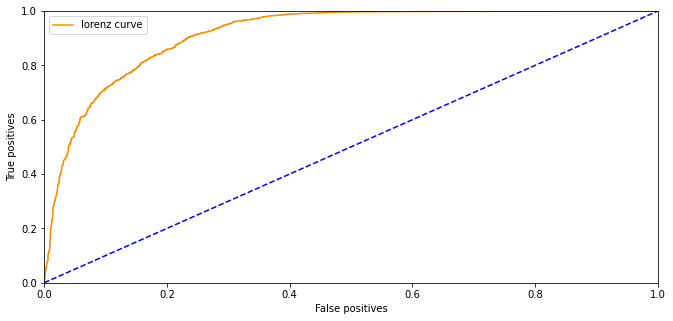

In [75]:
plt.figure(figsize=(11,5))
plt.plot(fpr, tpr, 'darkorange')
plt.plot([0,1],[0,1], 'b--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positives')
plt.ylabel('True positives')
plt.legend(['lorenz curve'])
plt.show()

In [76]:
sm.auc(fpr, tpr)

0.9154391488188253

More area under the **Lorenz curve** as well as higher **Gini Index(Coefficient)** indicates better performance at prediction

### (auc-0.5)/0.5=2*auc(fpr,tpr)-1

In [77]:
# gini index(coefficient)
gini=2*sm.auc(fpr, tpr)-1
gini

0.8308782976376505